## Exploratory Data Analysis (EDA) of Telco Customer Churn
### by A Kristin H

The purpose of this EDA is to find potential features that correlated to churn customer data.

The data contains:
 
*   Customer demographic data : gender, SeniorCitizen, Partner, Dependents
*   Service provided by Telco and customer subscribe data : PhoneService, MultipleLines, InternetService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
*   Customer account information : tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges and TotalCharges
*   Churn data customer within the last month





### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [5]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Load Dataset

In [6]:
# Show the dataset
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3818,8819-ZBYNA,Female,0,Yes,No,58,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),109.10,6393.65,No
5865,2621-UDNLU,Female,0,Yes,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.85,72,No
2881,4003-OCTMP,Female,0,Yes,No,31,Yes,No,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Electronic check,64.00,1910.75,No
6832,9173-IVZVP,Female,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.90,1146.05,No
1181,8399-YNDCH,Male,1,No,No,21,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),60.05,1236.15,Yes
6719,2509-TFPJU,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.75,1864.2,No
3649,0174-QRVVY,Male,0,Yes,Yes,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.35,1847.55,No
6738,3590-TCXTB,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,20.35,No
117,5299-RULOA,Female,0,Yes,Yes,10,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.25,1064.65,Yes
5836,2862-JVEOY,Male,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.15,124.4,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the table and information above we knew that:


1. Looks like the columns `SeniorCitizen`, `tenure`,`MonthlyCharge`, and `TotalCharge` must be numeric (integer, float) type. The rest of the columns are string
2. Still the `TotalCharge` column type is an object (string)
3. The column `SeniorCitizen` is a boolean (1/0) categorical data
4. The demographic data of customer such as `gender`, `Partner`, and `Dependants` are yes/no data
5. The service that choosen by customer data such as `PhoneService` and `MultipleLines`are yes/no data, meanwhile columns `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` are consist of 3 unique statements: yes, no and no internet service
6. The customer account information of `PaperlessBilling` and `Churn` are yes/no data
7. All of binary categorical format data is not uniform, sometimes using boolean (1/0), sometime using string (yes/no) statement.
8. There is no null data.




### Basic Data Cleansing

#### Preprocess the `TotalCharge` column

In [8]:
# exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Check the missing value

In [9]:
# Missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no missing value.

#### Duplicated Rows

In [10]:
# Checking duplicate rows
df.duplicated().sum()

0

There is no duplicated row. Check again the data info:

In [11]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


 After preprocess the data, sum of rows are 7032 now.

### Perform Standard EDA

#### Statistical summary of column

In [12]:
# Grouping the column based on the data type
df_num = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
df_cat = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [13]:
# Numerical statistical summary
df[df_num].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Findings:


*   `SeniorCitizen` is boolean column (1/0)
*   Mean < 50% data distribution (median) of `MonthlyCharges`, indicating negatively skewed distribution
*   Mean > 50% data distribution (median) of `TotaCharges`, indicating positively skewed distribution


In [14]:
# Categorical statistical summary
df[df_cat].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Findings:


*   The `Churn` as a target column is dominated by non-churn customers
*   Six columns of service that sign up by customer (`OnlineSecurity`-`StreamingMovies`) are dominated by No (nonsubscriber)
*   User's gender is slightly dominated by male





#### Univariate analysis

Boxplot to see distribution of data

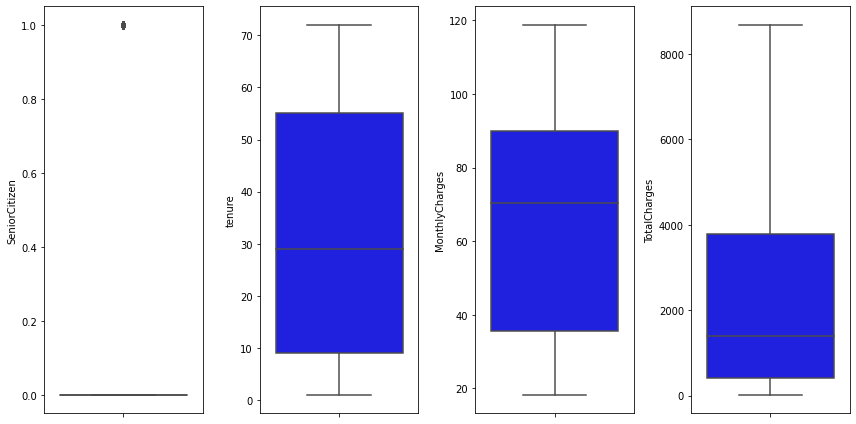

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = df_num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

KDE to see the concentration of data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

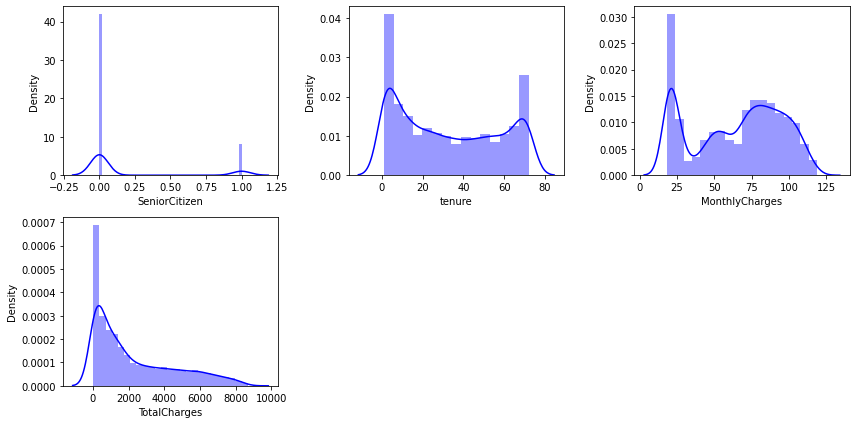

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = df_num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color = 'blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Findings:

*   User dominated by non-senior citizen
*   From `tenure` graph shows that majority of user stay for 1-5 months and 65-70 months
*   Most of user got billed around 20 permonth
*   Total bill that charged to the users distributed in less than 2000


Barplot for categorical feature display

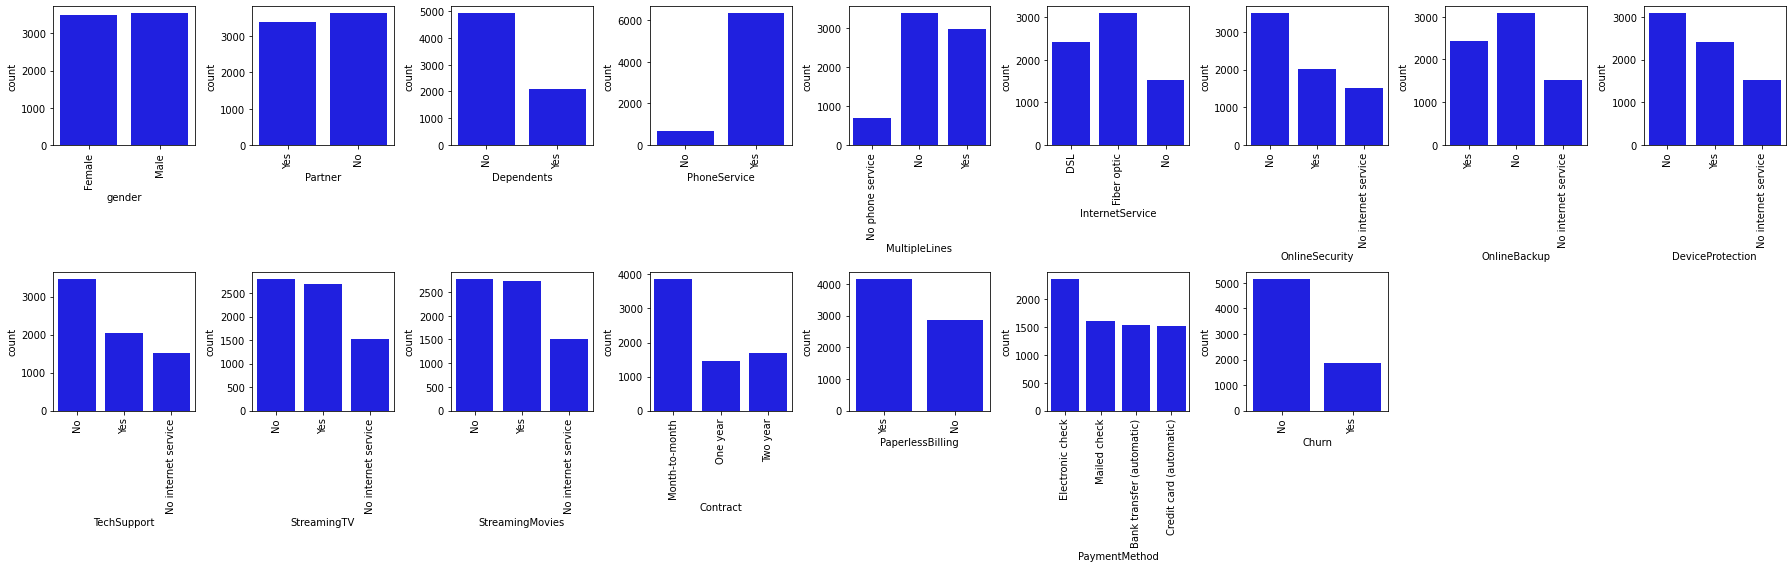

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(25,8))

# plotting
features = df_cat
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color = 'blue')
    plt.xticks(rotation = 90)
    plt.xlabel(features[i])
    plt.tight_layout()
    

#### Multivariate analysis

Churn status

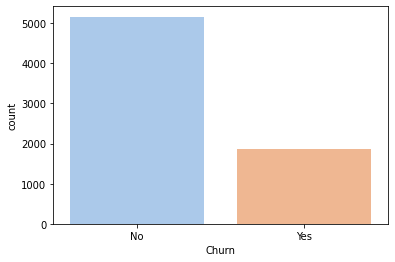

In [ ]:
# Churn counts
sns.countplot(data=df,
            x='Churn', palette = 'pastel')

In [ ]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Users who decided to churn is lesser than non-churn user during the last month.

1. Demographic categorical bivariate analysis

In [ ]:
# Subgrouping categorical feature
# Demographic feature of user
df_cat_dem = ['gender','Partner','Dependents']

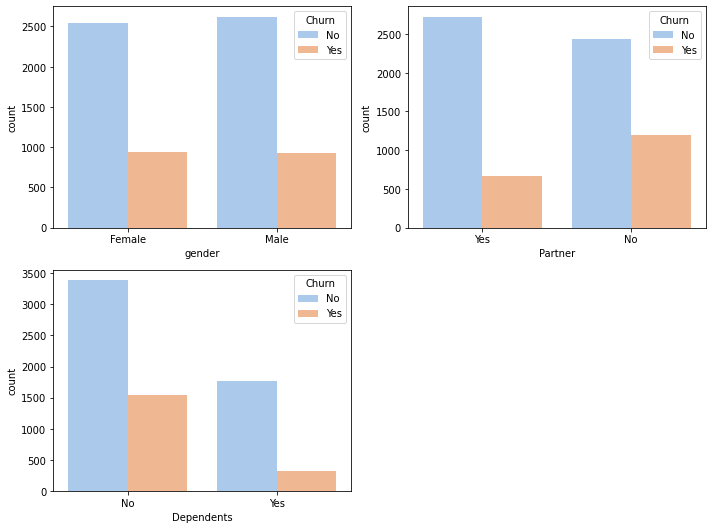

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(10,18))

# plotting
features = df_cat_dem
for i in range(0, len(features)):
    plt.subplot(5, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], hue = df['Churn'], palette='pastel')
    plt.xlabel(features[i])
    plt.tight_layout()

Findings:



*   There is no significant difference between male and female churn-customers
*   Users without partner are more likely tu churn than those who with the partner
*   Users without dependents also tend to churn rather than users with dependents



2. Service sign-up by customers bivariate analysis

In [ ]:
# Subgrouping categorical feature
# List of choosen service feature by user
df_cat_serv = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

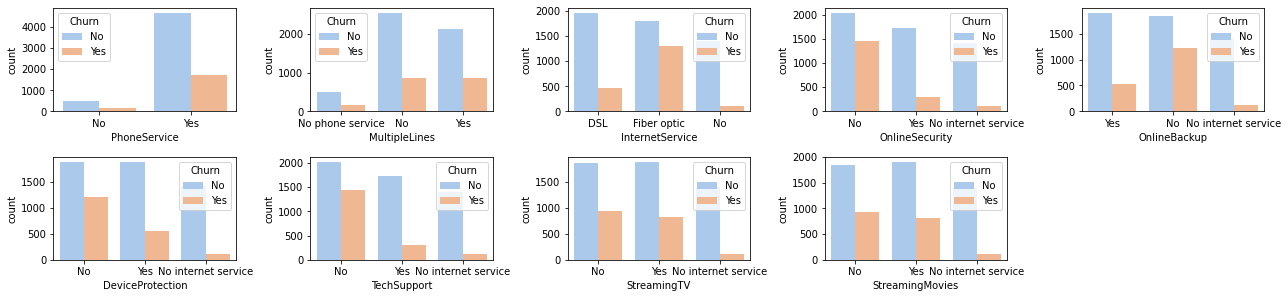

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(18,10))

# plotting
features = df_cat_serv
for i in range(0, len(features)):
    plt.subplot(5, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], hue = df['Churn'], palette='pastel')
    plt.xlabel(features[i])
    plt.tight_layout()

Findings:

*   Majority of users sign up for phone service, those who sign-up more likely to churn
*   Internet service users with fiber optic tend to churn
*   Users who did not sign up for online security, online back up, device protection  have higher churn customer
*   Users who subsribe for streaming and not streaming have slightly difference showing churns number


3. Customer account information bivariate analysis

In [ ]:
# Subgrouping categorical feature
# Accoount information feature of user
df_cat_acc = ['Contract','PaperlessBilling','PaymentMethod']

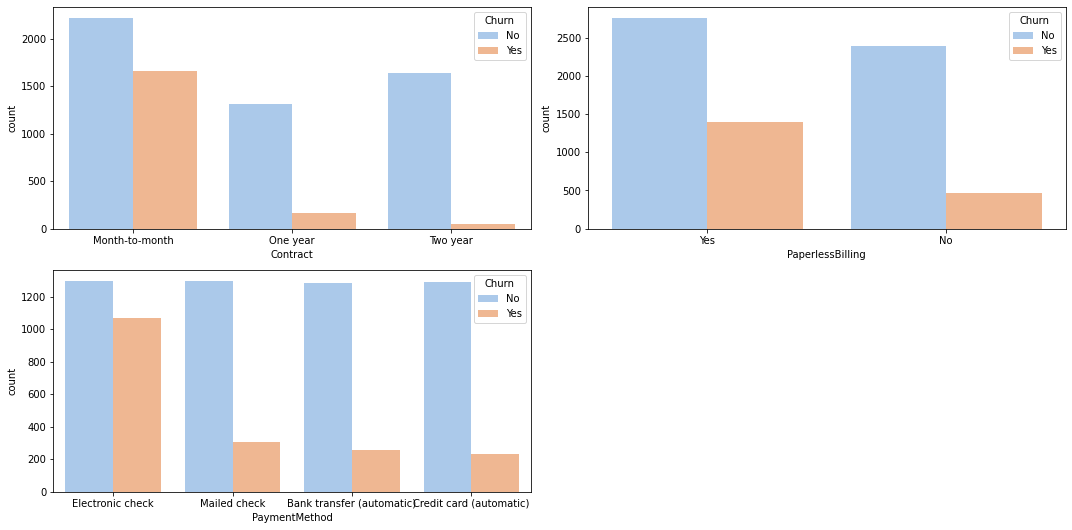

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,18))

# plotting
features = df_cat_acc
for i in range(0, len(features)):
    plt.subplot(5, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], hue = df['Churn'], palette='pastel')
    plt.xlabel(features[i])
    plt.tight_layout()

Findings:

*   Users with shorter contract, mainly month-to-month, are more likely to churn
*   Paperless-billing users are more probable to churn
*   Users who choose payment method via electronic check are more likely to churn
*   The accounts features above seems like important variable for churn status since the difference is quite significant


Correlation heatmap

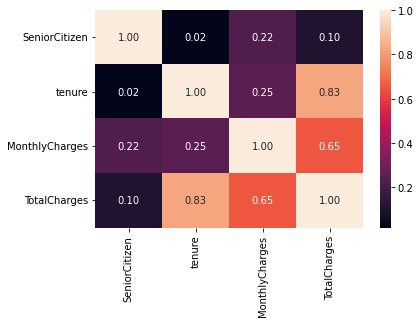

In [ ]:
# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Finding:

*   Total Charges are highly correlated to `tenure` and `MonthlyCharges`

Pairplot of all features

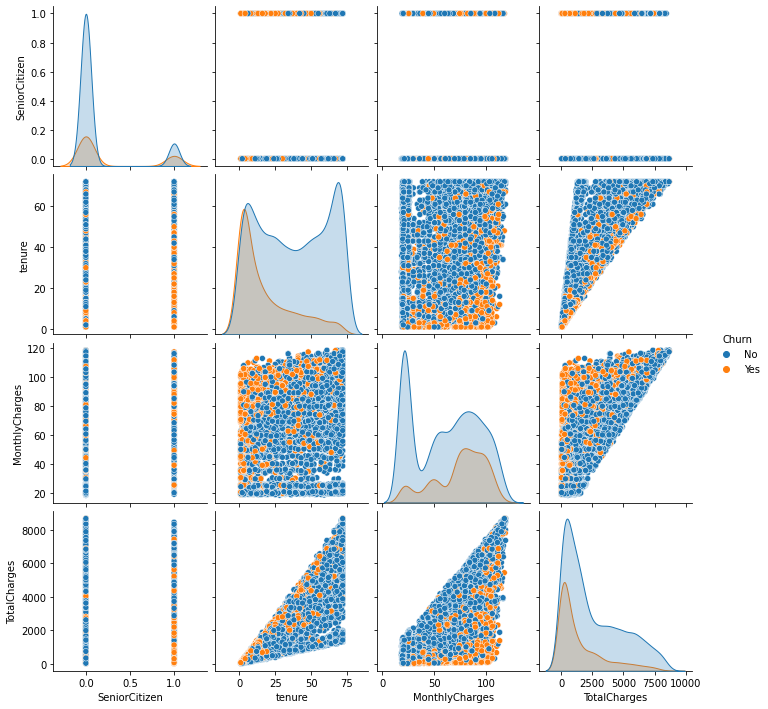

In [ ]:
# Pairplot of the data
sns.pairplot(df, hue='Churn')

Findings:

*   The customers tend to churn at the early month of sign in the Telco service

*   The customers are more likely to churn at higher 
month charges

*   Lower total charges shows the higher churn of customers




### Deep-dive Exploration

#### Questions and Answer

1. Which internet service is more expensive, fiber optic or DSL?

In [ ]:
# Internet service monthly bill
is_bill = ( df
           .groupby('InternetService')
           .agg(bill=('MonthlyCharges', 'median'))
           .reset_index()
           .sort_values('bill', ascending = False)
)
is_bill

,InternetService,bill
1,Fiber optic,91.675
0,DSL,56.150
2,No,20.150


Internet service using fiber optic is basically a lot faster than DSL. Therefore no surprise if its price is much expensive than DSL. But still the churn level of fiber is high. It seems that evaluation of fiber optic perfomance is needed accoding to the price offered to the customers.

2. How much the users who sign-up for phone and internet service are likely to churn?

In [ ]:
# grouping the services and churn feature
serv_count = (df
              .groupby(['Churn','PhoneService','InternetService'])
              .agg(num_of_users = ('customerID','count'))
)
serv_count

num_of_users
Churn PhoneService InternetService              
No    No           DSL                       510
      Yes          DSL                      1447
                   Fiber optic              1799
                   No                       1407
Yes   No           DSL                       170
      Yes          DSL                       289
                   Fiber optic              1297
                   No                        113

numbers of churn's user mostly came from those who sign up for phone service and fiber optic.

3. How much is the median monthly charge for each contract category?

In [ ]:
# Charges based on contract type
contract_bill = ( df
           .groupby(['Churn','Contract'])
           .agg(med_bill=('MonthlyCharges', 'median'),
                avg_bill=('MonthlyCharges','mean'),
                num_of_user =('customerID','count'))
           .reset_index()
)
contract_bill

,Churn,Contract,med_bill,avg_bill,num_of_user
0,No,Month-to-month,64.950,61.462635,2220
1,No,One year,64.850,62.540926,1306
2,No,Two year,63.550,60.112798,1637
3,Yes,Month-to-month,79.050,73.019396,1655
4,Yes,One year,95.050,85.050904,166
5,Yes,Two year,97.275,86.777083,48


In [ ]:
# Filtering the only churn customers
is_churn = contract_bill['Churn'] == 'Yes'

churn_contract_bill = contract_bill[is_churn]
churn_contract_bill

,Churn,Contract,med_bill,avg_bill,num_of_user
3,Yes,Month-to-month,79.050,73.019396,1655
4,Yes,One year,95.050,85.050904,166
5,Yes,Two year,97.275,86.777083,48


User with month-to-month contract have lesser bill but higher number of user. Meanwhile, one and two year contract with higher bill is much less than month-to-month's user. Customer with month-to-month contract tend to discontinue the subscription. Maybe its related to the low performance of the service at the beginning of sign-up.

### Conclusion

*   From demographic data, customer without partners and dependants are more likely to churn. This two features are important to mapping the customer segment and develop the next offer.
*   Customers who sign up for fiber optic are more likely to churn. Probably it is related to the performance of the service.
*   Month-to-month customers also tend to churn than those who already sign up for years.



